In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
using JSON

cross_validation_best_key_Jan_AM = readall("../temp_files/cross_validation_best_key_Jan_AM.json")
cross_validation_best_key_Jan_AM = JSON.parse(cross_validation_best_key_Jan_AM)

cross_validation_best_key_Jan_MD = readall("../temp_files/cross_validation_best_key_Jan_MD.json")
cross_validation_best_key_Jan_MD = JSON.parse(cross_validation_best_key_Jan_MD)

cross_validation_best_key_Jan_PM = readall("../temp_files/cross_validation_best_key_Jan_PM.json")
cross_validation_best_key_Jan_PM = JSON.parse(cross_validation_best_key_Jan_PM)

cross_validation_best_key_Jan_NT = readall("../temp_files/cross_validation_best_key_Jan_NT.json")
cross_validation_best_key_Jan_NT = JSON.parse(cross_validation_best_key_Jan_NT)

cross_validation_best_key_Jan_weekend = readall("../temp_files/cross_validation_best_key_Jan_weekend.json")
cross_validation_best_key_Jan_weekend = JSON.parse(cross_validation_best_key_Jan_weekend)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in readall(::String, ::Vararg{String,N}) at ./deprecated.jl:30
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/jzh/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /home/jzh/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading In[2], in expression starting on line 3


"(6,0.5,10000.0,3)"

In [3]:
coeffs_dict_Jan_AM = readall("../temp_files/coeffs_dict_Jan_AM.json")
coeffs_dict_Jan_AM = JSON.parse(coeffs_dict_Jan_AM)

coeffs_dict_Jan_MD = readall("../temp_files/coeffs_dict_Jan_MD.json")
coeffs_dict_Jan_MD = JSON.parse(coeffs_dict_Jan_MD)

coeffs_dict_Jan_PM = readall("../temp_files/coeffs_dict_Jan_PM.json")
coeffs_dict_Jan_PM = JSON.parse(coeffs_dict_Jan_PM)

coeffs_dict_Jan_NT = readall("../temp_files/coeffs_dict_Jan_NT.json")
coeffs_dict_Jan_NT = JSON.parse(coeffs_dict_Jan_NT)

coeffs_dict_Jan_weekend = readall("../temp_files/coeffs_dict_Jan_weekend.json")
coeffs_dict_Jan_weekend = JSON.parse(coeffs_dict_Jan_weekend)


coeffs_best_Jan_AM = coeffs_dict_Jan_AM[cross_validation_best_key_Jan_AM]
coeffs_best_Jan_MD = coeffs_dict_Jan_MD[cross_validation_best_key_Jan_MD]
coeffs_best_Jan_PM = coeffs_dict_Jan_PM[cross_validation_best_key_Jan_PM]
coeffs_best_Jan_NT = coeffs_dict_Jan_NT[cross_validation_best_key_Jan_NT]
coeffs_best_Jan_weekend = coeffs_dict_Jan_weekend[cross_validation_best_key_Jan_weekend]

7-element Array{Any,1}:
  1.0       
  0.00358791
  0.0139537 
 -0.00465429
  0.0259172 
 -0.0124903 
  0.00440058

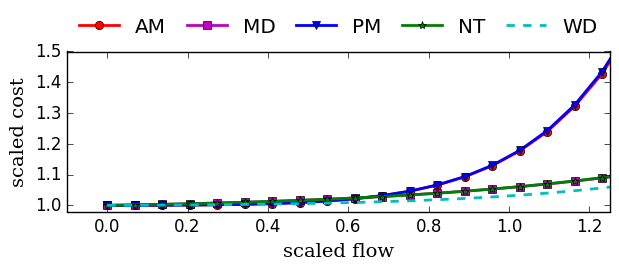

In [4]:
using PyPlot

xs = linspace(0, 1.3, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Jan_AM = map(x->polyEval(coeffs_best_Jan_AM, x), xs)
ys_Jan_MD = map(x->polyEval(coeffs_best_Jan_MD, x), xs)
ys_Jan_PM = map(x->polyEval(coeffs_best_Jan_PM, x), xs)
ys_Jan_NT = map(x->polyEval(coeffs_best_Jan_NT, x), xs)
ys_Jan_weekend = map(x->polyEval(coeffs_best_Jan_weekend, x), xs)

fig = figure(figsize=(7,2),)

plot(xs, ys_Jan_AM, "o-r", label="AM", linewidth=2)
plot(xs, ys_Jan_MD, "s-m", label="MD", linewidth=2)
plot(xs, ys_Jan_PM, "v-b", label="PM", linewidth=2)
plot(xs, ys_Jan_NT, "*-g", label="NT", linewidth=2)
plot(xs, ys_Jan_weekend, "--c", label="WD", linewidth=2)

legend(frameon=false, ncol=5, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", 
borderaxespad=0.2, numpoints=1)

# grid("on")
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("scaled flow", fontdict=font1)
ylabel("scaled cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Jan.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"MA_traffic_IEEE_special_issue_18/imag/"

savefig(dire * "fitting_comparison_Jan.pdf", dpi=300, bbox_inches="tight")

In [5]:
cross_validation_best_key_Jan_MD

"(6,1.5,10000.0,1)"

In [6]:
outfile = open("../temp_files/cost_func_Jan.txt", "w")

write(outfile,"coeffs_Jan_AM: $(coeffs_best_Jan_AM) \n \
coeffs_Jan_MD: $(coeffs_best_Jan_MD) \n \
coeffs_Jan_PM: $(coeffs_best_Jan_PM) \n \
coeffs_Jan_NT: $(coeffs_best_Jan_NT) \n \
coeffs_Jan_weekend: $(coeffs_best_Jan_weekend) \n")

close(outfile)